Analytical Capstone

Questions I am trying to answer:

1.	How does labor force education impacted employment and unemployment in agriculture, industry and services sectors of economy     in USA?  This will include years from 1994 to 2017. 
2.	Has there been an increase in advanced education in the labor force and has this lead to more workers in the service sector     of the economy of USA?

Data

1.	I will be using datasets from the World Data Indicator. 

File Download: http://databank.worldbank.org/data/download/WDI_csv.zip
2.	The following Indicators from the dataset will be used:

Indicator Name
Employment in agriculture (% of total employment) (modeled ILO estimate)
Employment in industry (% of total employment) (modeled ILO estimate)
Employment in services (% of total employment) (modeled ILO estimate)
Labor force with advanced education (% of total working-age population with advanced education)
Labor force with basic education (% of total working-age population with basic education)
Labor force with intermediate education (% of total working-age population with intermediate education)
Unemployment with advanced education (% of total labor force with advanced education)
Unemployment with basic education (% of total labor force with basic education)
Unemployment with intermediate education (% of total labor force with intermediate education)
Unemployment, total (% of total labor force) (modeled ILO estimate)
Unemployment, total (% of total labor force) (national estimate)

Minimum Viable Product

1.	Determine the relationship between education in the labor force and it’s impact on employment in the 3 sectors of the           economy.
2.	Determine the impact of labor force education and unemployment in the 3 sectors of the economy
		

	


In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import psycopg2
from contextlib import closing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np

In [2]:
cnx = psycopg2.connect("dbname='wdi' user='bcarter' host='localhost' password='bcarter'")
cnx.autocommit=True

In [3]:
query = '''
select a.value_year as year, 
       a.model_values as umemployeed_basic_ed, 
       b.model_values as unemployed_intermediate_ed,
       c.model_values as unemployed_advanced_ed,
       d.model_values as employed_agriculture,
       e.model_values as employed_industry,
       f.model_values as employed_services,
       g.model_values as total_labor_force_basic_ed,
       h.model_values as total_labor_force_intermediate_ed,
       i.model_values as total_labor_force_advanced_ed
from
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.UEM.BASC.ZS') a,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.UEM.INTM.ZS') b,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.UEM.ADVN.ZS') c,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.AGR.EMPL.ZS') d,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.IND.EMPL.ZS') e,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.SRV.EMPL.ZS') f,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.TLF.BASC.ZS') g,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.TLF.INTM.ZS') h,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.TLF.ADVN.ZS') i
where a.value_year between 1994 and 2017
  and a.value_year = b.value_year
  and c.value_year = a.value_year
  and d.value_year = a.value_year
  and e.value_year = a.value_year
  and f.value_year = a.value_year
  and g.value_year = a.value_year
  and h.value_year = a.value_year
  and i.value_year = a.value_year;
'''


In [4]:
query_target = '''
select a.value_year as year, 
       a.model_values as umemployeed_basic_ed, 
       b.model_values as unemployed_intermediate_ed,
       c.model_values as unemployed_advanced_ed,
       d.model_values as employed_agriculture,
       e.model_values as employed_industry,
       f.model_values as employed_services,
       g.model_values as total_labor_force_basic_ed,
       h.model_values as total_labor_force_intermediate_ed,
       i.model_values as total_labor_force_advanced_ed
from
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.UEM.BASC.ZS') a,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.UEM.INTM.ZS') b,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.UEM.ADVN.ZS') c,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.AGR.EMPL.ZS') d,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.IND.EMPL.ZS') e,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.SRV.EMPL.ZS') f,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.TLF.BASC.ZS') g,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.TLF.INTM.ZS') h,
(select indicator_code, value_year, model_values from wdi_modeling where indicator_code =  'SL.TLF.ADVN.ZS') i
where a.value_year between 2010 and 2015
  and a.value_year = b.value_year
  and c.value_year = a.value_year
  and d.value_year = a.value_year
  and e.value_year = a.value_year
  and f.value_year = a.value_year
  and g.value_year = a.value_year
  and h.value_year = a.value_year
  and i.value_year = a.value_year;
'''


In [5]:
df_target=pd.read_sql(query_target,cnx)

In [6]:
df_target.year = df_target.year.astype(int)

In [7]:
df_target.head()

,year,umemployeed_basic_ed,unemployed_intermediate_ed,unemployed_advanced_ed,employed_agriculture,employed_industry,employed_services,total_labor_force_basic_ed,total_labor_force_intermediate_ed,total_labor_force_advanced_ed
0,2010,15.7552,11.0254,5.2563,1.621,18.474001,79.905998,29.297501,53.445801,72.444199
1,2011,15.6235,10.9099,5.1699,1.646,18.573000,79.780998,28.909901,52.674900,71.883003
2,2012,14.8257,10.1284,4.9862,1.568,18.500000,79.932999,29.169001,51.819401,71.489998
3,2013,14.8257,10.1284,4.9862,1.568,18.500000,79.932999,29.169001,51.819401,71.489998
4,2014,11.5530,7.9270,3.8213,1.562,18.995001,79.443001,28.598101,50.627800,70.385399


In [8]:
df=pd.read_sql(query,cnx)

In [9]:
df.year = df.year.astype(int)

In [10]:
df.describe()

,year,umemployeed_basic_ed,unemployed_intermediate_ed,unemployed_advanced_ed,employed_agriculture,employed_industry,employed_services,total_labor_force_basic_ed,total_labor_force_intermediate_ed,total_labor_force_advanced_ed
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2005.500000,12.216921,7.126012,3.299596,1.884833,20.948542,77.166792,28.094050,55.058159,72.987925
std,7.071068,2.184569,1.880499,1.012841,0.474160,2.006231,2.392623,1.523829,2.962268,1.948237
min,1994.000000,8.024500,4.860600,2.094500,1.463000,18.474001,73.570000,24.356600,50.232300,69.309799
25%,1999.750000,11.118425,5.810250,2.569650,1.568000,18.875751,74.777752,27.945800,52.461025,71.784752
50%,2005.500000,11.904200,6.509050,3.051100,1.661500,21.105500,77.326000,28.587601,55.813801,73.157299
75%,2011.250000,13.935150,7.229125,3.392750,1.996250,23.034000,79.501751,29.102400,57.917749,74.353849
max,2017.000000,15.755200,11.025400,5.256300,2.794000,23.650999,79.932999,29.850401,58.476299,75.657402


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
year                                 24 non-null int64
umemployeed_basic_ed                 24 non-null float64
unemployed_intermediate_ed           24 non-null float64
unemployed_advanced_ed               24 non-null float64
employed_agriculture                 24 non-null float64
employed_industry                    24 non-null float64
employed_services                    24 non-null float64
total_labor_force_basic_ed           24 non-null float64
total_labor_force_intermediate_ed    24 non-null float64
total_labor_force_advanced_ed        24 non-null float64
dtypes: float64(9), int64(1)
memory usage: 2.0 KB


In [12]:
df.head(10)

,year,umemployeed_basic_ed,unemployed_intermediate_ed,unemployed_advanced_ed,employed_agriculture,employed_industry,employed_services,total_labor_force_basic_ed,total_labor_force_intermediate_ed,total_labor_force_advanced_ed
0,1994,14.3526,6.9461,3.1744,2.794,23.599001,73.608002,24.356600,58.077702,75.657402
1,1995,13.7549,6.4846,3.0425,2.779,23.650999,73.570000,25.115299,58.002201,75.514297
2,1996,13.7960,6.3102,2.8593,2.743,23.540001,73.717003,25.248100,58.177601,75.533600
3,1997,12.3494,6.0210,2.4618,2.649,23.598000,73.752998,25.964800,58.476299,75.636902
4,1998,11.3081,5.5007,2.2831,2.588,23.377001,74.033997,26.588800,58.135700,75.264801
5,1999,11.2973,5.1563,2.1481,2.483,22.938000,74.579002,27.168800,58.188702,74.734703
6,2000,10.5818,4.8606,2.0945,1.834,23.322001,74.844002,28.297300,57.889599,74.226898
7,2001,11.7216,5.4670,2.5872,1.711,22.607000,75.681999,28.467800,57.640400,73.409599
8,2002,12.0868,6.7538,3.1736,1.727,21.658001,76.614998,28.426701,57.197102,73.152397
9,2003,12.2812,6.8354,3.2499,1.683,21.278999,77.038002,28.712400,56.666100,73.252701


In [13]:
def linear_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)
    scaler = preprocessing.StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_scaled, y_train)
    y_prediction = regressor.predict(X_test_scaled)
    model_score=regressor.score(X_train_scaled, y_train)
    
    RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
    
    X_train_const = sm.add_constant(X_train_scaled)
    X_test_const = sm.add_constant(X_test_scaled)
    model = sm.OLS(y_train,X_train_const).fit()
    y_predictions = model.predict(X_test_const) 
    
    
    return RMSE, model.summary(), y_test,y_train, y_prediction, y_predictions, model_score
    

Data Visualization

In [14]:
def data_vis(X, title_name):
    plt.title(title_name)
    p=plt.hist(X)
    plt.show
    return 


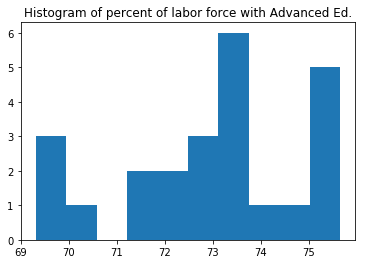

In [15]:
data_vis(df['total_labor_force_advanced_ed'], 'Histogram of percent of labor force with Advanced Ed.')

Text(0,0.5,'Pct.')

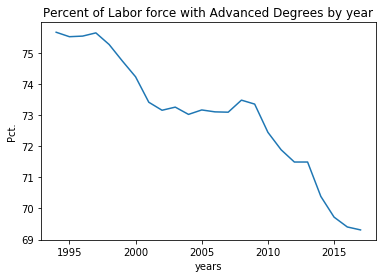

In [16]:
plt.plot(df['year'],df['total_labor_force_advanced_ed'])
plt.title('Percent of Labor force with Advanced Degrees by year')
plt.xlabel('years')
plt.ylabel('Pct.')

In [17]:
df['total_labor_force_advanced_ed'].describe()

count    24.000000
mean     72.987925
std       1.948237
min      69.309799
25%      71.784752
50%      73.157299
75%      74.353849
max      75.657402
Name: total_labor_force_advanced_ed, dtype: float64

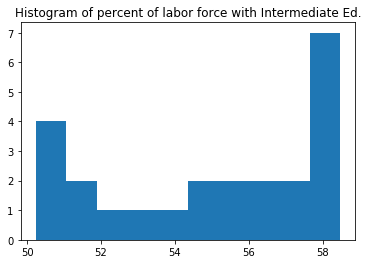

In [18]:
data_vis(df['total_labor_force_intermediate_ed'], 'Histogram of percent of labor force with Intermediate Ed.')

Text(0,0.5,'Pct.')

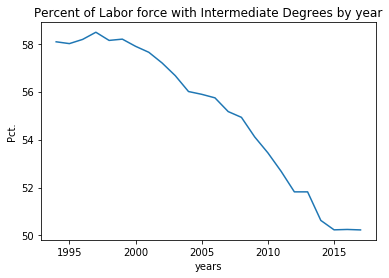

In [19]:
plt.plot(df['year'],df['total_labor_force_intermediate_ed'])
plt.title('Percent of Labor force with Intermediate Degrees by year')
plt.xlabel('years')
plt.ylabel('Pct.')

In [20]:
df['total_labor_force_intermediate_ed'].describe()

count    24.000000
mean     55.058159
std       2.962268
min      50.232300
25%      52.461025
50%      55.813801
75%      57.917749
max      58.476299
Name: total_labor_force_intermediate_ed, dtype: float64

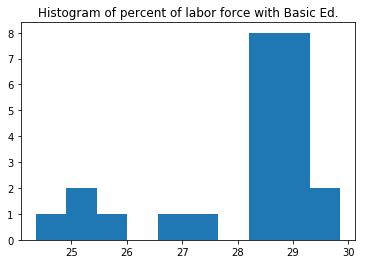

In [21]:
data_vis(df['total_labor_force_basic_ed'], 'Histogram of percent of labor force with Basic Ed.')

Text(0,0.5,'Pct.')

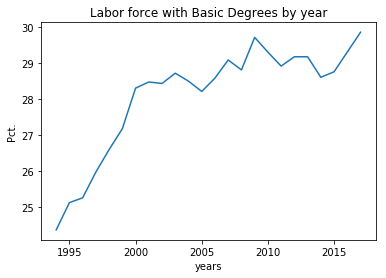

In [22]:
plt.plot(df['year'],df['total_labor_force_basic_ed'])
plt.title('Labor force with Basic Degrees by year')
plt.xlabel('years')
plt.ylabel('Pct.')

Model Data

Model 1 - predict employment in service industry

In [23]:
#features=['total_labor_force_basic_ed','total_labor_force_intermediate_ed','total_labor_force_advanced_ed']
features=['total_labor_force_basic_ed','total_labor_force_intermediate_ed','total_labor_force_advanced_ed']

target='employed_services'
X = df[features]
y= df[target]
y_true=df_target[target]

In [24]:
rmse_model1,model1_summary,y_test1,y_train1,y_pred1,y_preds1,r_squared1=linear_model(X,y)

/home/bcarter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [25]:
stats.pearsonr(y_pred1,y_preds1)

(1.0, 0.0)

In [26]:
print(r_squared1)

0.9724053611312053


In [27]:
print('Model RSME: ', rmse_model1)
print(model1_summary)


Model RSME:  0.8805664683357457
                            OLS Regression Results                            
Dep. Variable:      employed_services   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     141.0
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           1.28e-09
Time:                        08:44:14   Log-Likelihood:                -7.9036
No. Observations:                  16   AIC:                             23.81
Df Residuals:                      12   BIC:                             26.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.404

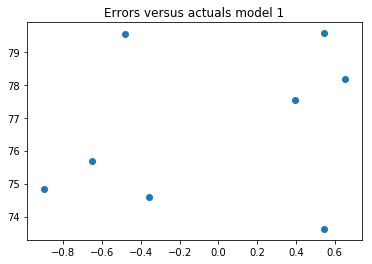

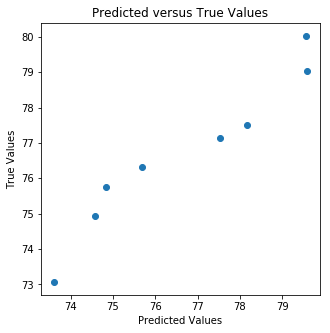

In [33]:
plt.scatter((y_test1 - y_pred1), y_test1)
plt.title('Errors versus actuals model 1')
plt.figure(figsize=(5,5))
plt.title('Predicted versus True Values')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.scatter(y_test1,y_pred1)

Model 2

In [29]:
features=['total_labor_force_basic_ed','total_labor_force_intermediate_ed','total_labor_force_advanced_ed']
target='employed_agriculture'
X = df[features]
y = df[target]
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled2=scaler.transform(X)

In [30]:
rmse_model2,model2_summary,y_test2,y_train2,y_pred2,y_preds2,r_squared2=linear_model(X,y)

/home/bcarter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [31]:
print('R**2: ', r_squared2)
print('Model 2 RSME: ', rmse_model2)
print(model2_summary)


R**2:  0.9072349605094412
Model 2 RSME:  0.18207203640346353
                             OLS Regression Results                             
Dep. Variable:     employed_agriculture   R-squared:                       0.907
Model:                              OLS   Adj. R-squared:                  0.884
Method:                   Least Squares   F-statistic:                     39.12
Date:                  Fri, 15 Feb 2019   Prob (F-statistic):           1.79e-06
Time:                          08:45:02   Log-Likelihood:                 8.5388
No. Observations:                    16   AIC:                            -9.078
Df Residuals:                        12   BIC:                            -5.987
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [32]:
y_test1

14    78.166000
5     74.579002
13    77.528000
22    79.549004
7     75.681999
6     74.844002
15    79.580002
0     73.608002
Name: employed_services, dtype: float64

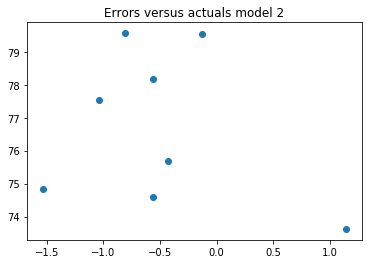

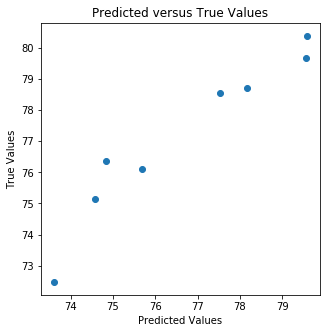

In [33]:
plt.scatter((y_test1 - y_pred1), y_test1)
plt.title('Errors versus actuals model 2')
plt.figure(figsize=(5,5))
plt.title('Predicted versus True Values')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.scatter(y_test1,y_pred1)

Model 3

In [34]:
features=['total_labor_force_basic_ed','total_labor_force_intermediate_ed','total_labor_force_advanced_ed']
target='employed_industry'
X = df[features]
y = df[target]
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled2=scaler.transform(X)

In [35]:
rmse_model3,model3_summary,y_test3,y_train3,y_pred3,y_preds3,r_squared3=linear_model(X,y)

/home/bcarter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [36]:
print('R**2: ', r_squared3)
print('Model 3 RSME: ', rmse_model3)
print(model3_summary)

R**2:  0.975058666801536
Model 3 RSME:  0.8301182386958165
                            OLS Regression Results                            
Dep. Variable:      employed_industry   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     156.4
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           6.98e-10
Time:                        08:45:24   Log-Likelihood:                -4.1304
No. Observations:                  16   AIC:                             16.26
Df Residuals:                      12   BIC:                             19.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

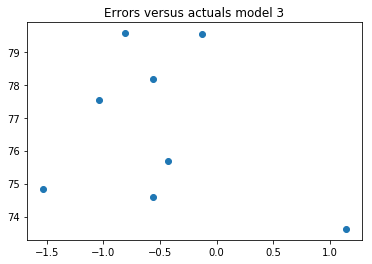

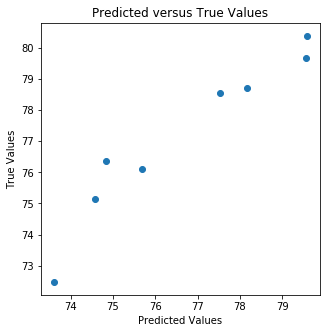

In [37]:
plt.scatter((y_test1 - y_pred1), y_test1)
plt.title('Errors versus actuals model 3')
plt.figure(figsize=(5,5))
plt.title('Predicted versus True Values')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.scatter(y_test1,y_pred1)

Model 4

In [38]:
features=['total_labor_force_basic_ed','total_labor_force_intermediate_ed','total_labor_force_advanced_ed']
target='unemployed_advanced_ed'
X = df[features]

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

scaler = preprocessing.StandardScaler().fit(X)
X_scaled2=scaler.transform(X)

y= df[target]

In [41]:
rmse_model4,model4_summary,y_test4,y_train4,y_pred4,y_preds4,r_squared4=linear_model(X,y)

/home/bcarter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [44]:
print('R**2: ', r_squared3)
print('Model 3 RSME: ', rmse_model3)
print(model3_summary)

R**2:  0.975058666801536
Model 3 RSME:  0.8301182386958165
                            OLS Regression Results                            
Dep. Variable:      employed_industry   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     156.4
Date:                Fri, 15 Feb 2019   Prob (F-statistic):           6.98e-10
Time:                        08:45:24   Log-Likelihood:                -4.1304
No. Observations:                  16   AIC:                             16.26
Df Residuals:                      12   BIC:                             19.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

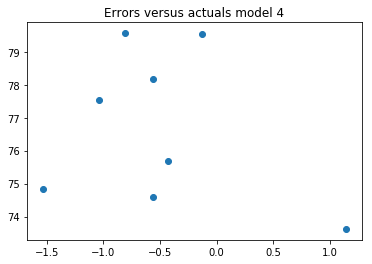

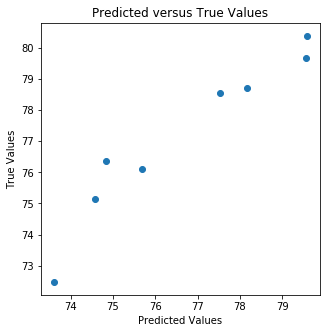

In [45]:
plt.scatter((y_test1 - y_pred1), y_test1)
plt.title('Errors versus actuals model 4')
plt.figure(figsize=(5,5))
plt.title('Predicted versus True Values')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.scatter(y_test1,y_pred1)